HW 2

1. (Monte Carlo Integration)

(a) Develop Matlab code to approximate the mean of a Beta(α, β) distribution with α = 3 and β = 4 using Monte Carlo integration. You can compare your answer with the analytic solution: α/(α + β).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *

In [3]:
N =100000
xr1 = np.random.uniform(0,1,size=N)
x1 = beta.pdf(xr1,3, 4)
ans1_1 = 1/N * sum(x1 * xr1)
print(f'When N={N},\n Beta distribution\'s mean = {ans1_1}')
print(f'The analytic solution is {3/(3+4)}')

When N=100000,
 Beta distribution's mean = 0.4282843138097632
The analytic solution is 0.42857142857142855


(b) Approximate the variance of a Gamma(a, b) distribution with a = 1.5 and b = 4 by Monte Carlo integration.Your approximation should get close to the theoretically derived answer.

In [4]:
N =100000
alpha, beta = 1.5, 4
xr2 = np.random.uniform(0,1,size=N)
x2 = gamma.pdf(xr2,alpha,1/beta)
mean2 = 1/N * sum(x2*xr2)
meansq = 1/N *sum(x2*xr2**2 )
var = meansq - mean2**2
print(f'When N={N},\n gamma distribution\'s variance is {var}')
print(f'The analytic solution is {alpha/beta**2}')

When N=100000,
 gamma distribution's variance is 0.10701811138515593
The analytic solution is 0.09375


2. Suppose we wish to generate random samples from the Cauchy distribution using importance sampling and MCMC. The probability density of the Cauchy is given by:
$$
f(\theta)=\frac{1}{\pi\left(1+\theta^{2}\right)}
$$
We will use the Normal distribution as the proposal distribution. Our proposals are generated from a $\operatorname{Normal}\left(\theta^{(t)}, \sigma\right)$ distribution.

(a) Generate 500 samples using

a. the importance sampling technique

b. the Metropolis sampler

c. using the $\mathrm{M}-\mathrm{H}$ sampler

(b) Estimate the probability density function using any density estimation technique based on the above samples from each method.

(c) Show the sequence of samples of each chain.

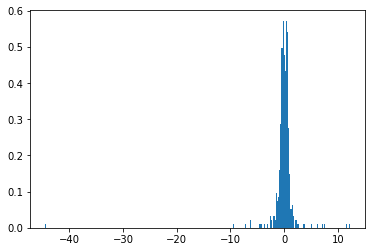

In [22]:
# a. h(x)= x, g(x)=N(0,1)
# the importance sampler=h(x)*(f(x)/g(x))
N2 = 500

def f(x):
    y1 = cauchy.pdf(x,0,1)
    return y1

def g(x):
    y2 = norm.pdf(x,0,1)
    return y2

x2r = np.random.normal(0,1,size=N2) 
# h(x)=x2r 
# the importance sampler:
x2a = x2r * f(x2r)/g(x2r)

plt.hist(x2a,bins=300,density=True)
plt.show()

b. Generate random samples from the Canchy dist.
using MCMC Metropolis sampler
$f(\theta)=\frac{1}{\pi\left(1+\theta^{2}\right)}$

step 1: genarate $\theta^{*}$ from $U(-1,1)$

Step 2: Calculate the acceptance probability, $\alpha=min \left(1, \frac{p\left(\theta^{*}\right)}{P\left(\theta^{(t-1)}\right)}\right)$

step 3: Generate a $u$ from a Uniform $(0,1)$ distribution.

step 4: Iterate until t=T (500)

In [5]:
T = N2
theta_0 = np.random.uniform(-1,1,T)

In [6]:
def gN(theta_0):
    g = norm.rvs(loc=theta_0,scale=1)
    return g

3. Some additional questions for Problem #1.

(a) Currently, in Problem #1 above, we take all states from the chain as samples to approximate the target distribution. Therefore, it also includes samples while the chain is still “burning in”. Why is this not a good idea? Can you modify the code such that the effect of burn-in is removed?

(b) Explore the effect of different starting conditions. For example, what happens when we start the chain with θ = −30?

(c) Calculate the proportion of samples that is accepted on average. Explore the effect of parameter σ on the average acceptance rate.